# Supervised Learning 3
## Decision Trees and Nodes

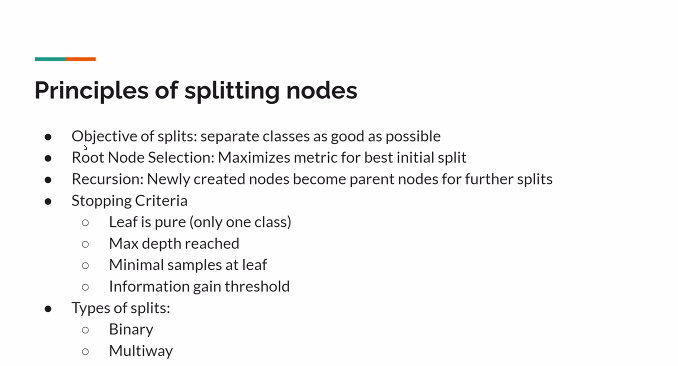

# Measuring the impurity of the node

#### We measure the Gini index to calculate care split ne duce la o impuritate minimă

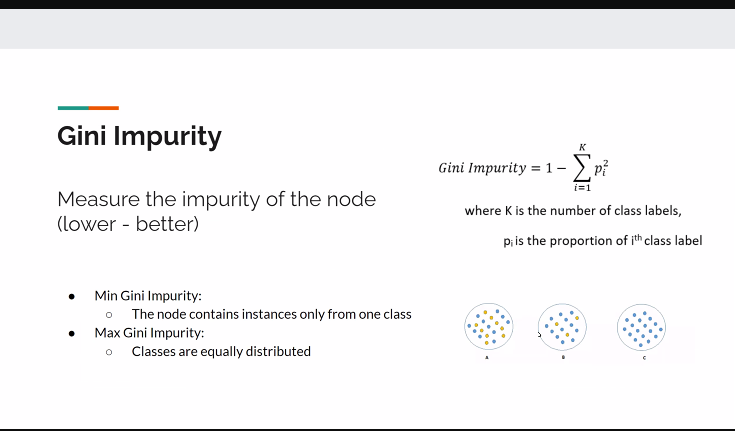

cases from above image
pi for the case b is equal to 1 - 0 because there is no yellow dots

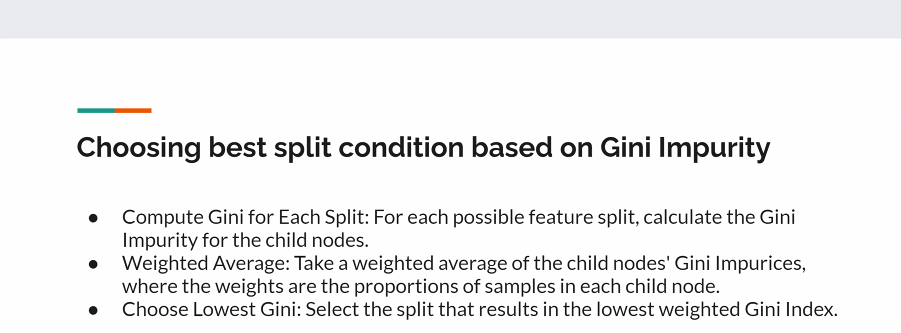

# Example of gini index
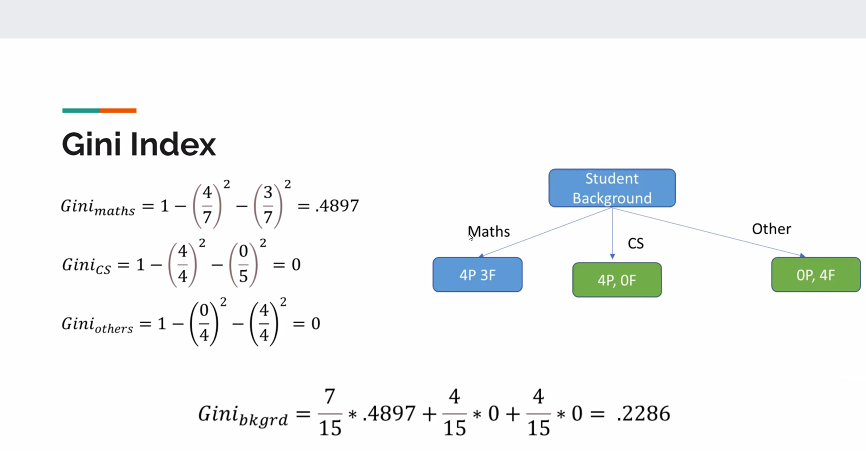

In [5]:
import pandas as pd

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("conorsully1/credit-score")

print("Path to dataset files:", path)

100%|██████████| 177k/177k [00:00<00:00, 436kB/s]

Extracting files...
Path to dataset files: C:\Users\uvang\.cache\kagglehub\datasets\conorsully1\credit-score\versions\1


In [13]:
df = pd.read_csv('data/credit_score_data.csv')

In [30]:
df

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,R_CLOTHING_SAVINGS,R_CLOTHING_DEBT,T_EDUCATION_12,T_EDUCATION_6,R_EDUCATION,R_EDUCATION_INCOME,R_EDUCATION_SAVINGS,R_EDUCATION_DEBT,T_ENTERTAINMENT_12,T_ENTERTAINMENT_6,R_ENTERTAINMENT,R_ENTERTAINMENT_INCOME,R_ENTERTAINMENT_SAVINGS,R_ENTERTAINMENT_DEBT,...,T_TRAVEL_6,R_TRAVEL,R_TRAVEL_INCOME,R_TRAVEL_SAVINGS,R_TRAVEL_DEBT,T_UTILITIES_12,T_UTILITIES_6,R_UTILITIES,R_UTILITIES_INCOME,R_UTILITIES_SAVINGS,R_UTILITIES_DEBT,T_EXPENDITURE_12,T_EXPENDITURE_6,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,0.0000,0.0035,0,0,0.5044,0.0000,0.1404,0.0000,3068,1554,0.5065,0.0922,0.0000,0.0058,...,11439,0.6393,0.5378,0.0000,0.0336,931,469,0.5038,0.0280,0.0655,0.0017,33269,19286,0.5797,1.0000,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,0.0638,0.0184,0,0,0.5001,0.0000,0.0000,0.0000,17244,8694,0.5042,0.2235,0.1891,0.0546,...,3133,0.1548,0.2622,0.2219,0.0641,2845,1423,0.5002,0.0369,0.0312,0.0090,70144,25114,0.3580,0.9091,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,0.0535,0.0022,0,0,0.5022,0.0000,0.0000,0.0000,3611,2231,0.6178,0.1168,0.1669,0.0068,...,9251,0.5756,0.5198,0.7426,0.0300,855,431,0.5041,0.0277,0.0395,0.0016,30917,17618,0.5698,1.0000,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,0.1063,0.0109,4402,2215,0.5032,0.0546,0.0682,0.0070,13446,6849,0.5094,0.1667,0.2084,0.0214,...,11835,0.4727,0.3104,0.3880,0.0398,2209,1112,0.5034,0.0274,0.0342,0.0035,80657,40205,0.4985,1.0000,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,0.0017,0.0008,0,0,0.5029,0.0000,0.0000,0.0000,5194,2675,0.5150,0.0346,0.0044,0.0022,...,12334,0.4379,0.1878,0.0240,0.0117,10338,5190,0.5020,0.0689,0.0088,0.0043,136337,62766,0.4604,0.9091,0.1163,0.0568,High,1,1,1,1,1,473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CZQHJC9HDH,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,0.0114,0.0030,0,0,0.5060,0.0000,0.0000,0.0000,9778,4926,0.5038,0.0297,0.0067,0.0018,...,39295,0.5289,0.2259,0.0507,0.0135,19305,9702,0.5026,0.0587,0.0132,0.0035,298993,155258,0.5193,0.9091,0.2041,0.0543,High,1,1,1,1,1,418,0
996,CZRA4MLB0P,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,0.0608,0.0079,0,0,0.5013,0.0000,0.0000,0.0000,28839,18396,0.6379,0.3543,0.3247,0.0424,...,3859,0.1567,0.3025,0.2773,0.0362,3480,1741,0.5003,0.0427,0.0392,0.0051,74004,31470,0.4252,0.9091,0.8333,0.1087,No,1,0,0,1,0,589,1
997,CZSOD1KVFX,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,0.0000,0.0000,0,0,0.5026,0.0000,0.0000,0.0000,0,0,0.6163,0.3664,0.0000,0.0000,...,6891,0.7827,0.1382,0.2075,0.2862,268,135,0.5037,0.0741,0.0063,0.0087,10607,7878,0.7427,1.0668,0.2500,0.3448,No,1,0,0,1,0,499,0
998,CZWC76UAUT,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,0.2491,0.0033,9622,4819,0.5008,0.2672,1.2024,0.0159,3587,1831,0.5105,0.0996,0.4483,0.0059,...,11824,0.8928,0.3678,1.6551,0.0219,1097,550,0.5014,0.0305,0.1371,0.0018,40012,26015,0.6502,1.1111,5.0002,0.0662,No,1,1,0,1,0,507,0


In [73]:
df.describe().astype(int)

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,R_CLOTHING_SAVINGS,R_CLOTHING_DEBT,T_EDUCATION_12,T_EDUCATION_6,R_EDUCATION,R_EDUCATION_INCOME,R_EDUCATION_SAVINGS,R_EDUCATION_DEBT,T_ENTERTAINMENT_12,T_ENTERTAINMENT_6,R_ENTERTAINMENT,R_ENTERTAINMENT_INCOME,R_ENTERTAINMENT_SAVINGS,R_ENTERTAINMENT_DEBT,T_FINES_12,...,T_TRAVEL_12,T_TRAVEL_6,R_TRAVEL,R_TRAVEL_INCOME,R_TRAVEL_SAVINGS,R_TRAVEL_DEBT,T_UTILITIES_12,T_UTILITIES_6,R_UTILITIES,R_UTILITIES_INCOME,R_UTILITIES_SAVINGS,R_UTILITIES_DEBT,T_EXPENDITURE_12,T_EXPENDITURE_6,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
mean,121610,413189,790718,4,6,5,6822,3466,0,0,0,0,3604,1811,0,0,0,0,14261,7945,0,0,0,0,26,...,31762,16675,0,0,0,0,6755,3394,0,0,0,0,104330,54247,0,0,0,0,0,0,0,0,0,586,0
std,113716,442916,981790,3,5,16,7486,5118,0,0,0,0,7065,3551,0,0,0,0,12388,7374,0,0,0,0,136,...,35822,22305,0,0,0,0,6313,3172,0,0,0,0,89250,49853,0,0,1,1,0,0,0,0,0,63,0
min,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1177,620,0,0,0,0,0,0,0,0,0,300,0
25%,30450,59719,53966,1,1,0,1084,319,0,0,0,0,0,0,0,0,0,0,4248,2289,0,0,0,0,0,...,5258,1395,0,0,0,0,1511,760,0,0,0,0,30216,15768,0,0,0,0,1,0,0,1,0,554,0
50%,85090,273850,395095,2,4,2,4494,1304,0,0,0,0,0,0,0,0,0,0,9401,5003,0,0,0,0,0,...,19417,8408,0,0,0,0,4090,2053,0,0,0,0,80639,40898,0,0,0,0,1,0,0,1,0,596,0
75%,181217,622260,1193230,6,8,4,10148,4555,0,0,0,0,5189,2611,0,0,0,0,22892,12304,0,0,0,0,0,...,48629,23954,0,0,0,0,11387,5736,0,0,0,0,155325,78459,0,1,0,0,1,0,0,1,0,630,1
max,662094,2911863,5968620,16,37,292,43255,39918,1,0,1,1,38229,19327,0,0,4,1,62529,44066,0,1,7,3,1421,...,216557,158788,1,1,6,7,20504,10316,0,0,0,0,472924,286987,0,2,10,10,1,1,1,1,1,800,1


<Axes: >

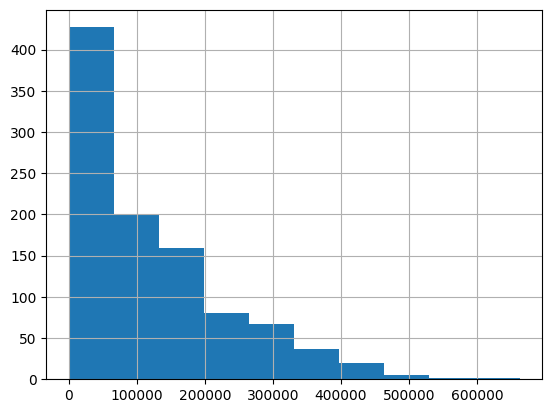

In [16]:
df.INCOME.hist()

In [74]:
df.isna()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,R_CLOTHING_SAVINGS,R_CLOTHING_DEBT,T_EDUCATION_12,T_EDUCATION_6,R_EDUCATION,R_EDUCATION_INCOME,R_EDUCATION_SAVINGS,R_EDUCATION_DEBT,T_ENTERTAINMENT_12,T_ENTERTAINMENT_6,R_ENTERTAINMENT,R_ENTERTAINMENT_INCOME,R_ENTERTAINMENT_SAVINGS,R_ENTERTAINMENT_DEBT,...,T_TRAVEL_6,R_TRAVEL,R_TRAVEL_INCOME,R_TRAVEL_SAVINGS,R_TRAVEL_DEBT,T_UTILITIES_12,T_UTILITIES_6,R_UTILITIES,R_UTILITIES_INCOME,R_UTILITIES_SAVINGS,R_UTILITIES_DEBT,T_EXPENDITURE_12,T_EXPENDITURE_6,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.CAT_GAMBLING.value_counts()	

CAT_GAMBLING
No      620
High    264
Low     116
Name: count, dtype: int64

### How to convert string in numbers
#### 1 -> You can give a certain value a number and replace it 
#### 2 -> You can create a binary column for every string type


In [29]:
pd.set_option('display.max_columns', 50)
pd.get_dummies(df, columns=["CAT_GAMBLING"])

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,R_CLOTHING_SAVINGS,R_CLOTHING_DEBT,T_EDUCATION_12,T_EDUCATION_6,R_EDUCATION,R_EDUCATION_INCOME,R_EDUCATION_SAVINGS,R_EDUCATION_DEBT,T_ENTERTAINMENT_12,T_ENTERTAINMENT_6,R_ENTERTAINMENT,R_ENTERTAINMENT_INCOME,R_ENTERTAINMENT_SAVINGS,R_ENTERTAINMENT_DEBT,...,R_TRAVEL_INCOME,R_TRAVEL_SAVINGS,R_TRAVEL_DEBT,T_UTILITIES_12,T_UTILITIES_6,R_UTILITIES,R_UTILITIES_INCOME,R_UTILITIES_SAVINGS,R_UTILITIES_DEBT,T_EXPENDITURE_12,T_EXPENDITURE_6,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT,CAT_GAMBLING_High,CAT_GAMBLING_Low,CAT_GAMBLING_No
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,0.0000,0.0035,0,0,0.5044,0.0000,0.1404,0.0000,3068,1554,0.5065,0.0922,0.0000,0.0058,...,0.5378,0.0000,0.0336,931,469,0.5038,0.0280,0.0655,0.0017,33269,19286,0.5797,1.0000,0.0000,0.0625,1,0,0,0,0,444,1,True,False,False
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,0.0638,0.0184,0,0,0.5001,0.0000,0.0000,0.0000,17244,8694,0.5042,0.2235,0.1891,0.0546,...,0.2622,0.2219,0.0641,2845,1423,0.5002,0.0369,0.0312,0.0090,70144,25114,0.3580,0.9091,0.7692,0.2222,1,0,0,1,0,625,0,False,False,True
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,0.0535,0.0022,0,0,0.5022,0.0000,0.0000,0.0000,3611,2231,0.6178,0.1168,0.1669,0.0068,...,0.5198,0.7426,0.0300,855,431,0.5041,0.0277,0.0395,0.0016,30917,17618,0.5698,1.0000,1.4286,0.0578,1,0,0,1,0,469,1,True,False,False
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,0.1063,0.0109,4402,2215,0.5032,0.0546,0.0682,0.0070,13446,6849,0.5094,0.1667,0.2084,0.0214,...,0.3104,0.3880,0.0398,2209,1112,0.5034,0.0274,0.0342,0.0035,80657,40205,0.4985,1.0000,1.2500,0.1282,1,0,0,1,0,559,0,True,False,False
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,0.0017,0.0008,0,0,0.5029,0.0000,0.0000,0.0000,5194,2675,0.5150,0.0346,0.0044,0.0022,...,0.1878,0.0240,0.0117,10338,5190,0.5020,0.0689,0.0088,0.0043,136337,62766,0.4604,0.9091,0.1163,0.0568,1,1,1,1,1,473,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CZQHJC9HDH,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,0.0114,0.0030,0,0,0.5060,0.0000,0.0000,0.0000,9778,4926,0.5038,0.0297,0.0067,0.0018,...,0.2259,0.0507,0.0135,19305,9702,0.5026,0.0587,0.0132,0.0035,298993,155258,0.5193,0.9091,0.2041,0.0543,1,1,1,1,1,418,0,True,False,False
996,CZRA4MLB0P,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,0.0608,0.0079,0,0,0.5013,0.0000,0.0000,0.0000,28839,18396,0.6379,0.3543,0.3247,0.0424,...,0.3025,0.2773,0.0362,3480,1741,0.5003,0.0427,0.0392,0.0051,74004,31470,0.4252,0.9091,0.8333,0.1087,1,0,0,1,0,589,1,False,False,True
997,CZSOD1KVFX,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,0.0000,0.0000,0,0,0.5026,0.0000,0.0000,0.0000,0,0,0.6163,0.3664,0.0000,0.0000,...,0.1382,0.2075,0.2862,268,135,0.5037,0.0741,0.0063,0.0087,10607,7878,0.7427,1.0668,0.2500,0.3448,1,0,0,1,0,499,0,False,False,True
998,CZWC76UAUT,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,0.2491,0.0033,9622,4819,0.5008,0.2672,1.2024,0.0159,3587,1831,0.5105,0.0996,0.4483,0.0059,...,0.3678,1.6551,0.0219,1097,550,0.5014,0.0305,0.1371,0.0018,40012,26015,0.6502,1.1111,5.0002,0.0662,1,1,0,1,0,507,0,False,False,True


In [31]:
def assess_risk(client):
    if client['INCOME'] <100:
        if client['SAVINGS'] < 100:
            return "default"
        else:
            return 'ok'
    else:
        if client['SAVINGS'] < 3000:
            return 'default'
        else:
            return 'ok'

In [35]:
assess_risk(df.loc[1])

'ok'

In [52]:
data=[
(0, 'default'),
(100, 'default'),
(150, 'default'),
(200, 'ok'),
(350, 'ok'),
(450, 'ok'),
(500, 'default'),
(800, 'ok')
]
df_example = pd. DataFrame(data, columns=['income', 'status']) 
df_example.sort_values('income', inplace=True)
df_example

,income,status
0,0,default
1,100,default
2,150,default
3,200,ok
4,350,ok
5,450,ok
6,500,default
7,800,ok


In [47]:
def calculate_gini_impuriti(dataframe):
    return 1-sum(dataframe.status.value_counts(normalize=True)**2)

In [53]:


thresholds = [100, 150, 200, 350, 450, 500, 800]
total_samples = len(df_example)
results = []
for threshold in thresholds:
    df_left = df_example[df_example["income"] < threshold]
    df_right = df_example[df_example["income"] > threshold]
    gini_left = calculate_gini_impuriti(df_left)
    gini_right = calculate_gini_impuriti(df_right)
    avg_impurity = (len(df_left) / total_samples)  * gini_left +  (len(df_right)/ total_samples) * gini_right
    print("Threshold:", threshold)
    display(df_left)
    display(df_right)
    print("Gini impurity left:", gini_left)
    print("Gini impurity right:", gini_right)
    print("Avg:", avg_impurity)
    print("\n")

    results.append({
        'threshold':threshold,
        'left_impurity': gini_left,
        'right impurity': gini_right,
        'avg imp': avg_impurity
    })

Threshold: 100


,income,status
0,0,default


,income,status
2,150,default
3,200,ok
4,350,ok
5,450,ok
6,500,default
7,800,ok


Gini impurity left: 0.0
Gini impurity right: 0.4444444444444444
Avg: 0.3333333333333333


Threshold: 150


,income,status
0,0,default
1,100,default


,income,status
3,200,ok
4,350,ok
5,450,ok
6,500,default
7,800,ok


Gini impurity left: 0.0
Gini impurity right: 0.31999999999999984
Avg: 0.1999999999999999


Threshold: 200


,income,status
0,0,default
1,100,default
2,150,default


,income,status
4,350,ok
5,450,ok
6,500,default
7,800,ok


Gini impurity left: 0.0
Gini impurity right: 0.375
Avg: 0.1875


Threshold: 350


,income,status
0,0,default
1,100,default
2,150,default
3,200,ok


,income,status
5,450,ok
6,500,default
7,800,ok


Gini impurity left: 0.375
Gini impurity right: 0.4444444444444444
Avg: 0.35416666666666663


Threshold: 450


,income,status
0,0,default
1,100,default
2,150,default
3,200,ok
4,350,ok


,income,status
6,500,default
7,800,ok


Gini impurity left: 0.48
Gini impurity right: 0.5
Avg: 0.425


Threshold: 500


,income,status
0,0,default
1,100,default
2,150,default
3,200,ok
4,350,ok
5,450,ok


,income,status
7,800,ok


Gini impurity left: 0.5
Gini impurity right: 0.0
Avg: 0.375


Threshold: 800


,income,status
0,0,default
1,100,default
2,150,default
3,200,ok
4,350,ok
5,450,ok
6,500,default


,income,status


Gini impurity left: 0.48979591836734704
Gini impurity right: 1
Avg: 0.42857142857142866




In [54]:
pd.DataFrame(results)

,threshold,left_impurity,right impurity,avg imp
0,100,0.000000,0.444444,0.333333
1,150,0.000000,0.320000,0.200000
2,200,0.000000,0.375000,0.187500
3,350,0.375000,0.444444,0.354167
4,450,0.480000,0.500000,0.425000
5,500,0.500000,0.000000,0.375000
6,800,0.489796,1.000000,0.428571


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(df.drop(columns="status"), df['status'], test_size=0.3, random_state=42)



In [ ]:
from sklearn.impute import SimpleImputer
# THe below code is used for null values, you can read on docs about SimpleImputer
imputer = SimpleImputer(strategy="Mean")
x_train.loc[:, ['income', "assets", "debt"]] =imputer.fit_transform(x_train[['income', "assets", "debt"]])
x_val.loc[:, ['income', "assets", "debt"]] = imputer.transform(x_val[['income', "assets", "debt"]])

In [ ]:
x_train.isnull().sum()

In [ ]:
#Read about DecisionTree Classifier in documentation
from sklearn.tree import DecisionTreeClassifier
#Below library is used to check the accuracy model
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)

accuracy_score(y_train, y_pred_train)

In [ ]:
accuracy_score(y_val, y_pred_val)

In [ ]:
model.tree_.max_depth

In [ ]:
y_train.value_counts(normalize = True)

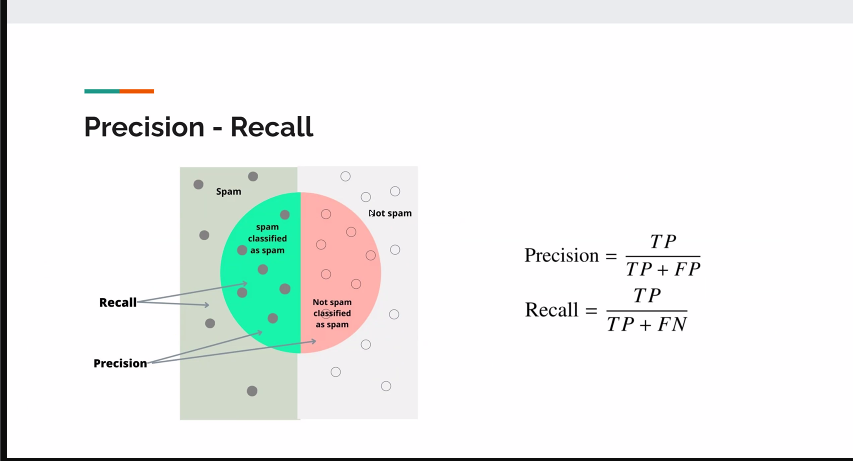

### Recall sugereaza cate exemple am clasificat ca spam
### Precision este precizia cu care am clasificat

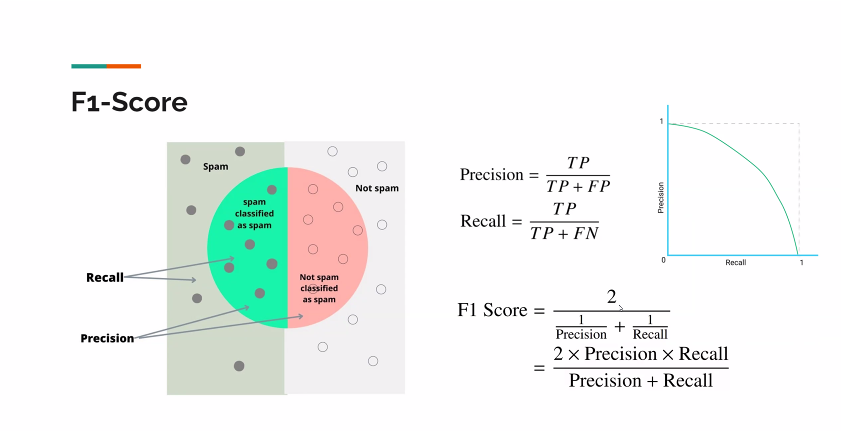

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred_train)
f1_score(y_val, y_pred_val)


In [62]:
score=[]
for max_deth in [2,3,4,5,6,7,10,15,20]:
    for min_samples_leaf in [1,2,5,10,20,100]:
        model = DecisionTreeClassifier(max_depth=max_deth, min_samples_leaf= min_samples_leaf, class_weight='balance' )

        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        score = f1_score(y_val, y_pred)
        score.append((max_deth,min_samples_leaf, score))

NameError: name 'x_train' is not defined

In [ ]:
df_scores = pd.DataFrame(score, columns=["max_deth", "min_samples_leaf", "score"])
df_scores_pivot = df_scores.pivot(index="max_deth", columns="min_samples_leaf", value="score")
df_scores

In [ ]:
df_scores_pivot = df_scores.pivot(index="max_deth", columns="min_samples_leaf", value="score")

import seaborn as sns

sns.heatmap(df_scores_pivot, annot=True)

In [ ]:
model = DecisionTreeClassifier (max_depth=3, class_weight='balanced')
model.fit(x_train, y_train)
y_pred_train
model.predict(x_train)
y_pred_val = model.predict(x_val)
f1_score(y_train, y_pred_train)

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=x_train.columsn, class_names=["ok", 'default'], rounded=True)
plt.show()

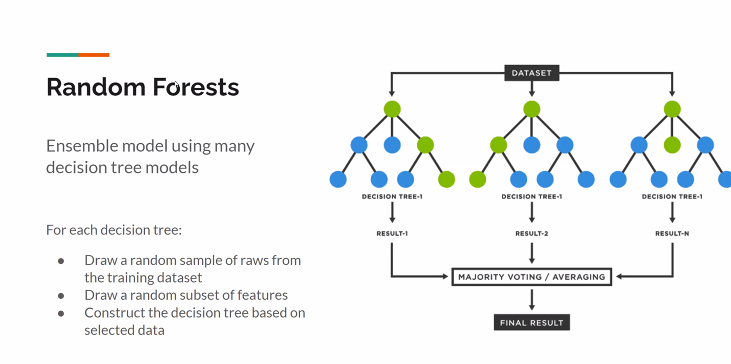
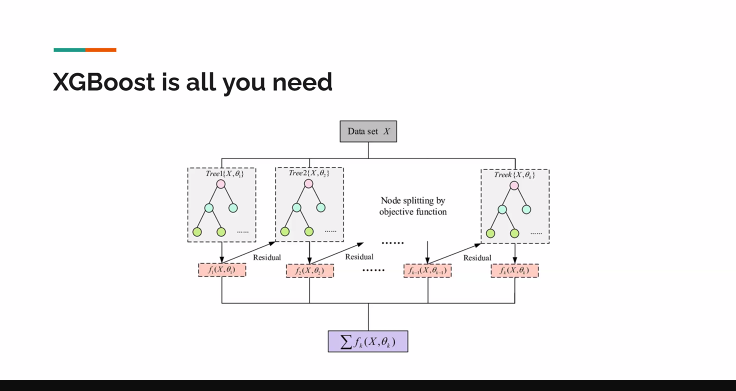

b

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight="balanced")

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)

f1_score(y_train, y_pred_train)

In [64]:
#You can use tqdm to check how much time remains for a certain operation to run
from tqdm import tqdm
score=[]
for max_deth in tqdm([2,3,4,5,6,7,10,15,20]):
    for min_samples_leaf in tqdm([1,2,5,10,20,100]):
        model = DecisionTreeClassifier(max_depth=max_deth, min_samples_leaf= min_samples_leaf, class_weight='balance' )

        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        score = f1_score(y_val, y_pred)
        score.append((max_deth,min_samples_leaf, score))

  0%|          | 0/9 [00:00<?, ?it/s]


NameError: name 'x_train' is not defined

In [ ]:
df_scores = pd.DataFrame(score, columns=["max_deth", "min_samples_leaf", "score"])
df_scores_pivot = df_scores.pivot(index="max_deth", columns="min_samples_leaf", value="score")
df_scores

In [66]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred_val = model.predict(x_val)

f1_score(y_val, y_pred_val)


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 1.6/124.9 MB 4.7 MB/s eta 0:00:27
    --------------------------------------- 2.6/124.9 MB 4.6 MB/s eta 0:00:27
   - -------------------------------------- 3.9/124.9 MB 5.2 MB/s eta 0:00:24
   - -------------------------------------- 5.2/124.9 MB 5.4 MB/s eta 0:00:23
   -- ------------------------------------- 6.3/124.9 MB 5.4 MB/s eta 0:00:23
   -- ------------------------------------- 7.9/124.9 MB 5.7 MB/s eta 0:00:21
   -- ------------------------------------- 8.9/124.9 MB 5.6 MB/s eta 0:00:21
   --- ------------------------------------ 10.2/124.9 MB 5.8 MB/s eta 0:00:20
   --- ------------------------------------ 11.5/124.9 MB 5.8 MB/s eta 0:00:20
   ---- ----------------------------------- 12.8/124.9 MB 5.8 MB/s eta 0:00:20
   ---- ----------------------------------- 13.9/124.9 MB 5.8 MB/s e

In [ ]:
for max_deth in tqdm([2,3,4,5,6,7,10,15,20]):
    for min_child_weight in tqdm([1,2,5,10,20,100]):
        model = XGBClassifier(min_child_weight = min_child_weight,max_depth=max_deth)

        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        score = f1_score(y_val, y_pred)
        score.append((max_deth,min_samples_leaf, score))

In [ ]:
df_scores = pd.DataFrame(score, columns=["max_deth", "min_samples_leaf", "score"])
df_scores_pivot = df_scores.pivot(index="max_deth", columns="min_samples_leaf", value="score")
sns.heatmap(df_scores_pivot, annot=True)

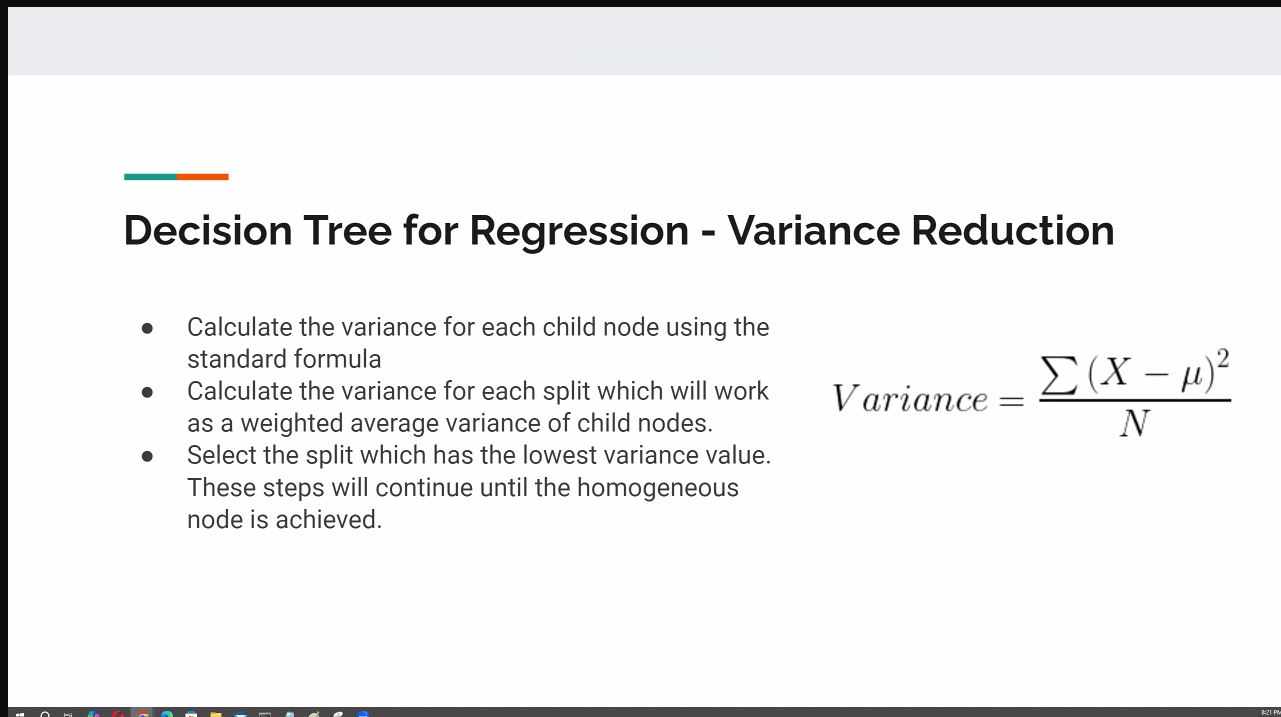

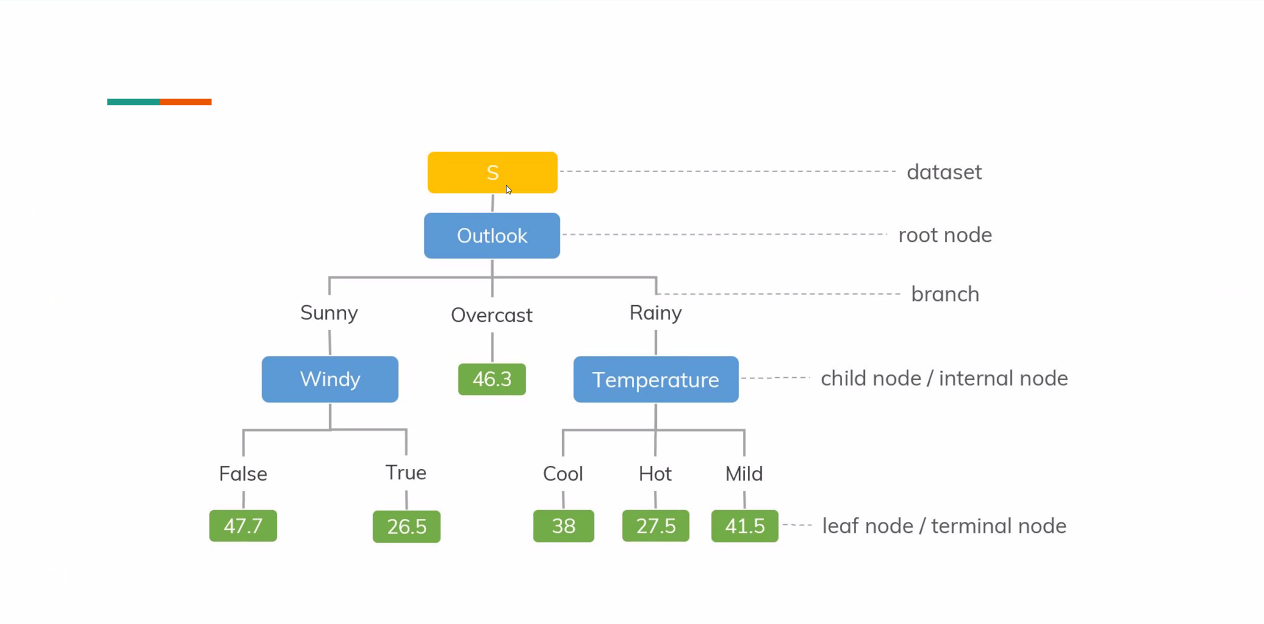